# Multiple Linear Regression

Previously there was only one input/target variable. We now deal with the case with multiple target variables. We can write $x_j$ which represents the $j^{\text{th}}$ feature or target variable and let $n$ be the number of features. To denote the features of the $i^{\text{th}}$ training example we write $\vec{x}\,^{(i)}$. So $x_{j}^{(i)}$ represents the value of feature $j$ in training example $i$. For example $\vec{x}\,^{(2)} = [1,2,3]$ shows the value of the $j=3$ target variables in training set $i=2$. Note that for the rest of notes the vector arrow can be removed and thought of as a matrix quantity instead,

## Model Representation

We can write our new model as the following:

$$h_{\theta}(x) = \sum_{j=0}^{n}\theta_j x_j$$

We will instead use vectors for easier notation:

$$h_{\theta}(x) = \vec{\theta} \cdot \vec{x}$$

This is a multiple linear regression model. The cost function is then

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(\vec{x}\,^{(i)})-y^{(i)}\right)^{2}$$

## Gradient Descent

We have the following:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

We can rewrite the first term to simplify notation

$$
\vec{\theta} := \vec{\theta} - \alpha \nabla J(\theta)
$$

Computing the gradient and partial derivative gives
$$
\vec{\theta} := \vec{\theta} - \frac{\alpha}{m}\sum_{i=1}^{m} \left(h_{\theta}(\vec{x}^{\,(i)})-y^{(i)}\right)\vec{x}^{\,(i)}
$$

As mentioned before there are other types of gradient descent. One type is stochastic gradient descent and is written as follows:

$$
\vec{\theta} := \vec{\theta}- \alpha\left(h_{\theta}(\vec{x}^{\,(i)})-y^{(i)}\right)\vec{x}^{\,(i)}
$$

Stochastic gradient descent only uses one training example and then updates compared to batch gradient descent which goes over the whole training set before updating. It is typically used for large data sets as it is much faster. However, a tradeoff is the fact that it may never "converge" to the global minimum and the parameters will simply oscillate around it. Most of the time these values near the minimum are good enough. If the learning rate decreases to zero as the algorithm runs then it is possible for there to be convergence as this causes the oscillations will decrease.


## The Normal Equation

For linear regression there is an alternate way to solve for the parameters. The normal equation allows a solution without iterations. It does not generalize to other learning algorithms and is slow for a large amount of features. This fact that the gradient descent may be faster than finding an exact solution can be seen throughout. Let $X$ be the matrix whose columns are of the $x_j$ quantities or

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n} \\ 
 x^{(2)}_0 & x^{(2)}_1 & \cdots & x^{(2)}_{n} \\
 \cdots \\
 x^{(m)}_0 & x^{(m)}_1 & \cdots & x^{(m)}_{n} 
\end{pmatrix}
$$

Then,

$$\vec{\theta} = (X^{T}X)^{-1}X^{T}\vec{y}$$

Note that it can be the case where $$X^{T}X$$ is non invertible. There is a fix for this but it will not be discussed.

## Probabilistic Interpretation

Assume the target variables and inputs can be written as

$$y^{(i)} = \vec{\theta} \cdot \vec{x}\,^{(i)} + \varepsilon^{(i)}$$

where $\varepsilon^{(i)}$ is an error term. Next assume that the $\varepsilon^{(i)}$ are distributed identically, independently, and normally with zero mean and variance $\sigma^{2}$. We can write this as $\varepsilon^{(i)} \sim \mathcal{N}(0,\sigma^{2})$. Thus, the probability density of $\varepsilon^{(i)}$ is given by

$$p(\varepsilon^{(i)}) = \frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(\varepsilon^{(i)})^2}{2\sigma^{2}}\right)$$

which implies

$$p(y^{(i)}|\vec{x}\,^{(i)};\vec{\theta})=\frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2}{2\sigma^{2}}\right)$$

Note that since the $\vec{\theta}$ are not random variables we should not put it in the conditional. Given the matrix $X$ and $\theta$ what is the distribution of the $y^{(i)}$'s? The probability of the data is given by $p(\vec{y}|X;\vec{\theta})$. This is usually viewed as a function of $\vec{y}$ (and possibly $X$) for a fixed value of $\vec{\theta}$. If we instead view it as a function $\vec{\theta}$ it is called the likelihood function (note we will drop the vector arrow on theta for simplicity):

$$L(\theta)=L(\theta;X,\vec{y})=(\vec{y}|X;\theta)$$

By the previous assumption of the independence of $\varepsilon^{(i)}$ we can also write this as 

$$L(\theta)=\prod_{i=1}^{m} p(y^{(i)}|\vec{x}\,^{(i)};\theta) = \prod_{i=1}^{m} \frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2}{2\sigma^{2}}\right)$$

The principal of maximum likelihood says that we should choose $\theta$ to make the data as high probability as possible (maximize $L(\theta)$). We can also maximize any strictly increasing function of $L(\theta)$. In particular we can instead maximize the log likelihood $\ell(\theta)$

\begin{align}
\ell(\theta) &= \ln(L(\theta)) \\[6pt]
&= \ln \prod_{i=1}^{m} \frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2}{2\sigma^{2}}\right)\\[6pt]
& = \sum_{i=1}^{m} \ln \frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2}{2\sigma^{2}}\right) \\[6pt]
&= \sum_{i=1}^{m} \ln \frac{1}{\sqrt{2 \pi}\sigma} + \sum_{i=1}^{m} \ln \exp\left(-\frac{(y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2}{2\sigma^{2}}\right) \\[6pt]
&= n\ln\frac{1}{\sqrt{2 \pi}\sigma} - \frac{1}{2\sigma^2}\sum_{i=1}^{m} (y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2
\end{align}

So equivalently we must minimize

$$\frac{1}{2}\sum_{i=1}^{m} (y^{(i)}-\vec{\theta} \cdot \vec{x}\,^{(i)})^2$$

which is our cost function $J(\theta)$ (the sign in the bracket does not matter due to the square). Note that the $1/m$ is missing but this is only needed for reducing the cost function further and is not technically needed. So maximizing $\ell(\theta)$ is the same as minimizing $J(\theta)$.

## Code Example

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([[1,2104, 5, 1, 45], [1,1416, 3, 2, 40], [1,852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
w_init = np.zeros(5)
iterations = 1000
alpha = 5.0e-7

### Prediction

In [2]:
def predict(x, w):
    return np.dot(x,w)

### Cost Function

In [3]:
def compute_cost(X,y,w):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        pred = predict(X[i],w)
        cost += (pred-y[i])**2
    
    return cost / (2*m)

### Gradient

In [4]:
def compute_gradient(X,y,w):
    m,n = X.shape
    dj_dw = np.zeros(n)
    
    for i in range(m):  
        pred = predict(X[i],w) 
        err = pred - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j] 
    dj_dw = dj_dw / m 
        
    return dj_dw

### Gradient Descent

In [5]:
def gradient_descent(X, y, w_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    J_history = []
    
    for i in range(num_iters):
        dj_dw = gradient_function(X, y, w)
                                   
        w = w - alpha * dj_dw
        
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w))
        
    print(J_history[-1])
    return w, J_history

In [6]:
def stoch_grad_descent(X,y,w_in,alpha,num_iters,cost_function,compute_gradient):
    m = X.shape[0]
    w = w_in
    J_history = []
    
    for iteration in range(num_iters):
        for i in range(m):
             dj_dw = 1/m * X[i] * (np.dot(X[i],w) - y[i]) #The 1/m gets rid of dependency on data set size
             w = w - alpha * dj_dw
        if iteration<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w))
    
    print(J_history[-1])
    return w, J_history

686.7034116665205
h(w) found by gradient descent: w=[-0.00223541  0.20396569  0.00374919 -0.0112487  -0.0658614 ]


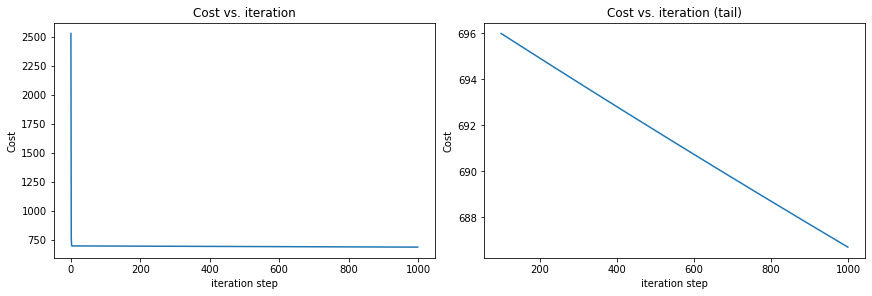

In [7]:
w_final, J_hist = gradient_descent(X_train ,y_train, w_init, alpha, 
                                                    1000, compute_cost, compute_gradient)
print(f"h(w) found by gradient descent: w={w_final}")

# w_final, J_hist = stoch_grad_descent(X_train ,y_train, w_init, alpha, 
#                                                     1000, compute_cost, compute_gradient)
# print(f"h(w) found by stochastic gradient descent: w={w_final}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()